Для начала создадим искусственный набор данных, включающий два линейно разделимых класса точек на двумерной плоскости.

In [2]:
import numpy as np
import tensorflow as tf

In [6]:
num_samples_per_class = 100
negative_samples = np.random.multivariate_normal(mean=[-2, 0],
                                                 cov=[[1, 0.9],
                                                      [0.9, 0.5]],
                                                 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[2, 0],
                                                 cov=[[1, 0.5],
                                                      [0.5, 0.4]],
                                                 size=num_samples_per_class)
input = np.vstack((negative_samples,positive_samples)).astype(np.float32)

<ipython-input-6-224bb6644a00>:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  negative_samples = np.random.multivariate_normal(mean=[-2, 0],


In [7]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
 np.ones((num_samples_per_class, 1), dtype="float32")))

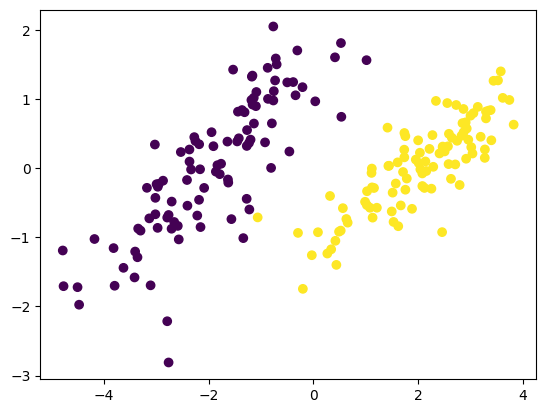

In [9]:
import matplotlib.pyplot as plt
plt.scatter(input[:, 0], input[:, 1], c=targets[:, 0])

In [3]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
W,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.01861   ],
        [0.50337005]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [4]:
learning_rate = 0.1

def model_predict(inputs):
  return tf.matmul(input,W) + b

def rmse_score(target, predict):
  return tf.reduce_mean(tf.square((target-predict)**2))

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model_predict(inputs)
    loss = rmse_score(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate) #.assign_sub - вычетание
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [10]:
for step in range(40):
 loss = training_step(input, targets)
 print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.8656
Loss at step 1: 0.2056
Loss at step 2: 0.0778
Loss at step 3: 0.0489
Loss at step 4: 0.0370
Loss at step 5: 0.0296
Loss at step 6: 0.0245
Loss at step 7: 0.0209
Loss at step 8: 0.0181
Loss at step 9: 0.0159
Loss at step 10: 0.0141
Loss at step 11: 0.0127
Loss at step 12: 0.0116
Loss at step 13: 0.0106
Loss at step 14: 0.0097
Loss at step 15: 0.0090
Loss at step 16: 0.0084
Loss at step 17: 0.0079
Loss at step 18: 0.0074
Loss at step 19: 0.0070
Loss at step 20: 0.0066
Loss at step 21: 0.0063
Loss at step 22: 0.0060
Loss at step 23: 0.0057
Loss at step 24: 0.0055
Loss at step 25: 0.0053
Loss at step 26: 0.0051
Loss at step 27: 0.0049
Loss at step 28: 0.0047
Loss at step 29: 0.0046
Loss at step 30: 0.0044
Loss at step 31: 0.0043
Loss at step 32: 0.0042
Loss at step 33: 0.0041
Loss at step 34: 0.0040
Loss at step 35: 0.0039
Loss at step 36: 0.0038
Loss at step 37: 0.0037
Loss at step 38: 0.0037
Loss at step 39: 0.0036


In [11]:
W,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.19700569],
        [-0.13469103]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.4841567], dtype=float32)>)

predict = W[0] * x + W[1] * y + b, для разделяющей прямой нам надо быбрать знчаение predict = 0.5, тогда

<ipython-input-17-89afc579e6f7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, y, "-r",linestyle='--')


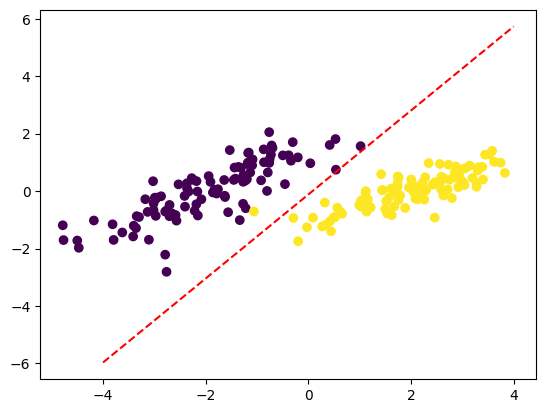

In [17]:
x = np.linspace(-4, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r",linestyle='--')
plt.scatter(input[:, 0], input[:, 1], c=targets[:, 0])